In [1]:
import os
import sqlite3
import pandas as pd
from tqdm import tqdm
from pathlib import Path
from zipfile import ZipFile
from datatable import dt, f, by
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
from plotly import express as px, io as pio

pd.options.plotting.backend = 'plotly'
pio.renderers.default = 'plotly_mimetype+notebook_connected'

# Bases de Dados

## CNES

In [2]:
path_zip_cnes = f'{Path.home()}/Databases/CNES/CNES.csv.gzip'
df_cnes = dt.fread(path_zip_cnes)
df_cnes = df_cnes[:, dt.count(), by('cnes')].sort(-f.count).to_pandas()
n_cnes = df_cnes.shape[0]
df_cnes

,cnes,count
0,27863,10
1,2421534,10
2,2750643,9
3,19445,8
4,2025361,8
...,...,...
130269,9715541,1
130270,9715568,1
130271,9715576,1
130272,9715584,1


## SINASC

In [3]:
path_zip_sinasc = f'{Path.home()}/Databases/SINASC/SINASC.csv.gzip'
df_cnes_sinasc = dt.fread(path_zip_sinasc)
df_cnes_sinasc = df_cnes_sinasc[:, dt.count(), by('cnes')].sort(-f.count).to_pandas()
n_sinasc = df_cnes_sinasc.shape[0]
df_cnes_sinasc

,cnes,count
0,2079542,145885
1,3037274,115195
2,2232,104344
3,26794,103932
4,2323397,101349
...,...,...
8204,9491252,1
8205,9505253,1
8206,9569723,1
8207,9619488,1


## SIH

In [4]:
path_zip_sih = f'{Path.home()}/Databases/SIHSUS/SIHSUS.csv.gzip'
df_cnes_sih = dt.fread(path_zip_sih)
df_cnes_sih = df_cnes_sih[:, dt.count(), by('cnes')].sort(-f.count).to_pandas()
n_sih = df_cnes_sih.shape[0]
df_cnes_sih

,cnes,count
0,2232,101955
1,3151794,75209
2,2323397,74712
3,2311682,64833
4,26794,63700
...,...,...
4144,7320175,1
4145,7603029,1
4146,7621442,1
4147,7704364,1


# Interseção

## SINASC & SIH

### Lista dos CNES

In [5]:
sinasc_sih = df_cnes_sinasc.merge(df_cnes_sih, on='cnes', how='inner', suffixes=('_sinasc', '_sih'))
n_sinasc_sih = sinasc_sih.shape[0]
sinasc_sih

,cnes,count_sinasc,count_sih
0,2232,104344,101955
1,26794,103932,63700
2,2323397,101349,74712
3,2022621,99602,28260
4,2311682,87673,64833
...,...,...,...
4087,2796597,1,63
4088,5590663,1,13
4089,6452302,1,98
4090,6559379,1,2


### Venn

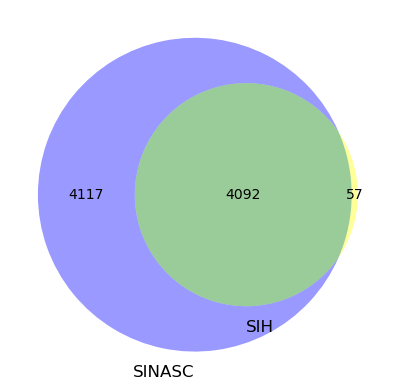

In [6]:
c = venn2(
  subsets = (
    n_sinasc - n_sinasc_sih,
    n_sih - n_sinasc_sih,
    n_sinasc_sih,
  ), set_labels = ('SINASC', 'SIH'),
  set_colors=('blue', 'yellow'))
c.get_patch_by_id('11').set_color('green')
c.get_patch_by_id('11').set_edgecolor('none')
c.get_patch_by_id('11').set_alpha(0.4)
plt.show()

## SINASC & CNES

### Lista dos CNES

In [7]:
sinasc_cnes = df_cnes_sinasc.merge(df_cnes, on='cnes', how='inner', suffixes=('_cnes', '_sinasc'))
n_sinasc_cnes = sinasc_cnes.shape[0]
sinasc_cnes

,cnes,count_cnes,count_sinasc
0,2232,104344,2
1,26794,103932,3
2,2323397,101349,2
3,2022621,99602,2
4,2311682,87673,4
...,...,...,...
7013,9208968,1,1
7014,9322825,1,1
7015,9491112,1,1
7016,9491252,1,1


### Venn

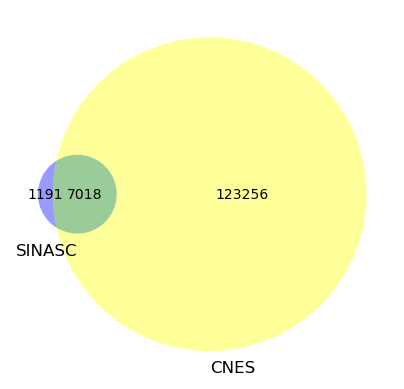

In [8]:
c = venn2(
  subsets = (
    n_sinasc - n_sinasc_cnes,
    n_cnes - n_sinasc_cnes,
    n_sinasc_cnes,
  ), set_labels = ('SINASC', 'CNES'),
  set_colors=('blue', 'yellow'))
c.get_patch_by_id('11').set_color('green')
c.get_patch_by_id('11').set_edgecolor('none')
c.get_patch_by_id('11').set_alpha(0.4)
plt.show()

In [9]:
4117-1191

2926

## SIH & CNES

### Lista dos CNES

In [10]:
sih_cnes = df_cnes_sih.merge(df_cnes, on='cnes', how='inner', suffixes=('_cnes', '_sih'))
n_sih_cnes = sih_cnes.shape[0]
sih_cnes

,cnes,count_cnes,count_sih
0,2232,101955,2
1,3151794,75209,3
2,2323397,74712,2
3,2311682,64833,4
4,26794,63700,3
...,...,...,...
4141,7320175,1,3
4142,7603029,1,2
4143,7621442,1,2
4144,7704364,1,2


### Venn

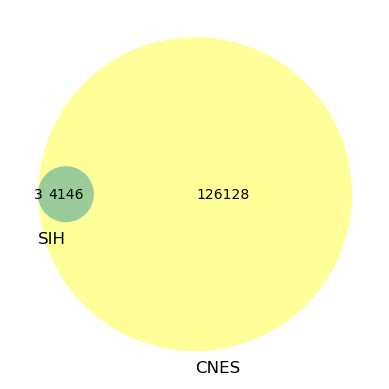

In [11]:
c = venn2(
  subsets = (
    n_sih - n_sih_cnes,
    n_cnes - n_sih_cnes,
    n_sih_cnes,
  ), set_labels = ('SIH', 'CNES'),
  set_colors=('blue', 'yellow'))
c.get_patch_by_id('11').set_color('green')
c.get_patch_by_id('11').set_edgecolor('none')
c.get_patch_by_id('11').set_alpha(0.4)
plt.show()

## (SINASC & CNES) not in SIH

In [12]:
df_info_cnes = pd.read_csv(path_zip_cnes)
sinasc_cnes_sih = sinasc_cnes.merge(df_cnes_sih, on='cnes', how='inner', suffixes=('_sinasc_cnes', '_sih'))
s_cnes = set(sinasc_cnes_sih['cnes'])
s_cnes = set(sinasc_cnes[~sinasc_cnes['cnes'].isin(s_cnes)]['cnes'])
print(len(s_cnes))
inpect_cnes = df_info_cnes[df_info_cnes['cnes'].isin(s_cnes)]
inpect_cnes = inpect_cnes.sort_values(by=['cnes'], ignore_index=True)
inpect_cnes['cnes'] = inpect_cnes['cnes'].apply(lambda x: ('0' * 7 + str(x))[-7:])
inpect_cnes

2928


,cnes,uf,cod_mun,esfera_adm,retencao_tributos,tipo_retenção,natureza
0,0000035,PE,260290.0,NaN,NaN,NaN,NaN
1,0000035,PE,260290.0,MUNICIPAL,Estabelecimento PUBLICO,Estabelecimento PUBLICO,"Administração Direta da Saúde (MS, SES, e SMS)"
2,0000183,PE,260290.0,PRIVADA,Estabelecimento PRIVADO LUCRATIVA,NaN,Empresa Privada
3,0000221,PE,260290.0,PRIVADA,Estabelecimento PRIVADO LUCRATIVA,NaN,Empresa Privada
4,0000426,PE,261160.0,ESTADUAL,Estabelecimento PUBLICO,Estabelecimento PUBLICO,"Administração Direta da Saúde (MS, SES, e SMS)"
...,...,...,...,...,...,...,...
5728,9541004,GO,521020.0,NaN,NaN,NaN,NaN
5729,9546146,RJ,330630.0,NaN,NaN,NaN,NaN
5730,9548149,GO,520450.0,NaN,NaN,NaN,NaN
5731,9551476,PE,261060.0,NaN,NaN,NaN,NaN


In [13]:
# inpect_cnes.to_excel('inspect_cnes.xlsx')

### Repetidos

In [14]:
inpect_cnes['cnes'].value_counts().hist()